<a href="https://colab.research.google.com/github/imanait/ID-20/blob/master/inspecting_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


In [0]:
train=pd.read_csv("Train.csv")

In [0]:
train.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 40 columns):
X                                 16466 non-null float64
Y                                 16466 non-null float64
target_2015                       16466 non-null float64
elevation                         16466 non-null float64
precip 2014-11-16 - 2014-11-23    16466 non-null float64
precip 2014-11-23 - 2014-11-30    16466 non-null float64
precip 2014-11-30 - 2014-12-07    16466 non-null float64
precip 2014-12-07 - 2014-12-14    16466 non-null float64
precip 2014-12-14 - 2014-12-21    16466 non-null float64
precip 2014-12-21 - 2014-12-28    16466 non-null float64
precip 2014-12-28 - 2015-01-04    16466 non-null float64
precip 2015-01-04 - 2015-01-11    16466 non-null float64
precip 2015-01-11 - 2015-01-18    16466 non-null float64
precip 2015-01-18 - 2015-01-25    16466 non-null float64
precip 2015-01-25 - 2015-02-01    16466 non-null float64
precip 2015-02-01 - 2015-02-08    16

In [0]:
train.columns

Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-0

In [0]:
len(train.columns)

40

In [0]:
train.shape

(16466, 40)

count    16466.000000
mean         0.076609
std          0.228734
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target_2015, dtype: float64


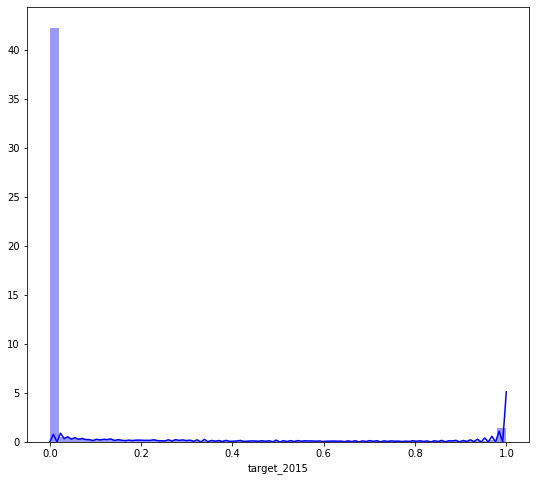

In [0]:
print(train["target_2015"].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train["target_2015"],color="b")

In [0]:
list(set(train.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [0]:
train_num = train.select_dtypes(include = ['float64', 'int64'])

In [0]:
train_num.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26c8254ef0>,
      dtype=object)

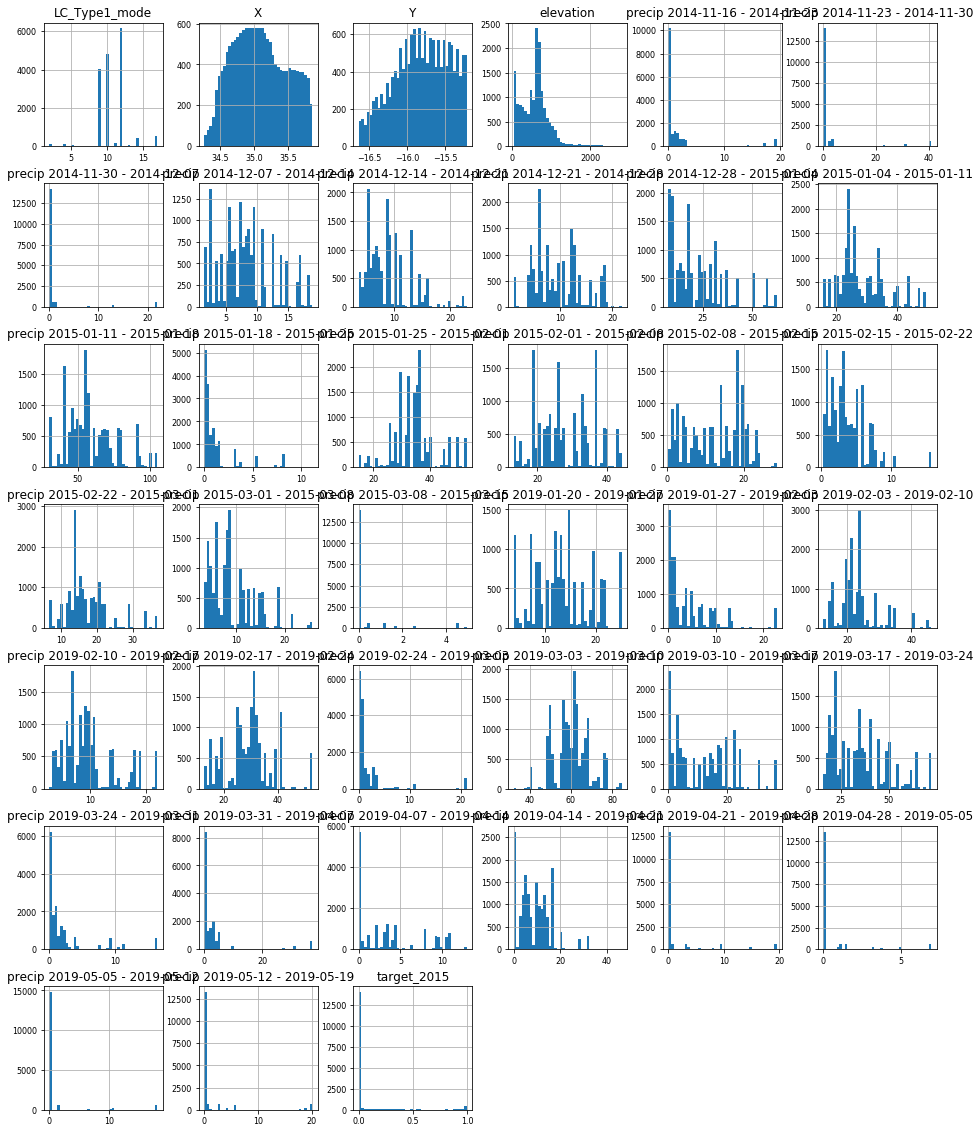

In [0]:
train_num.hist(figsize=(16,20),bins=40,xlabelsize=8, ylabelsize=8)

Correlation:


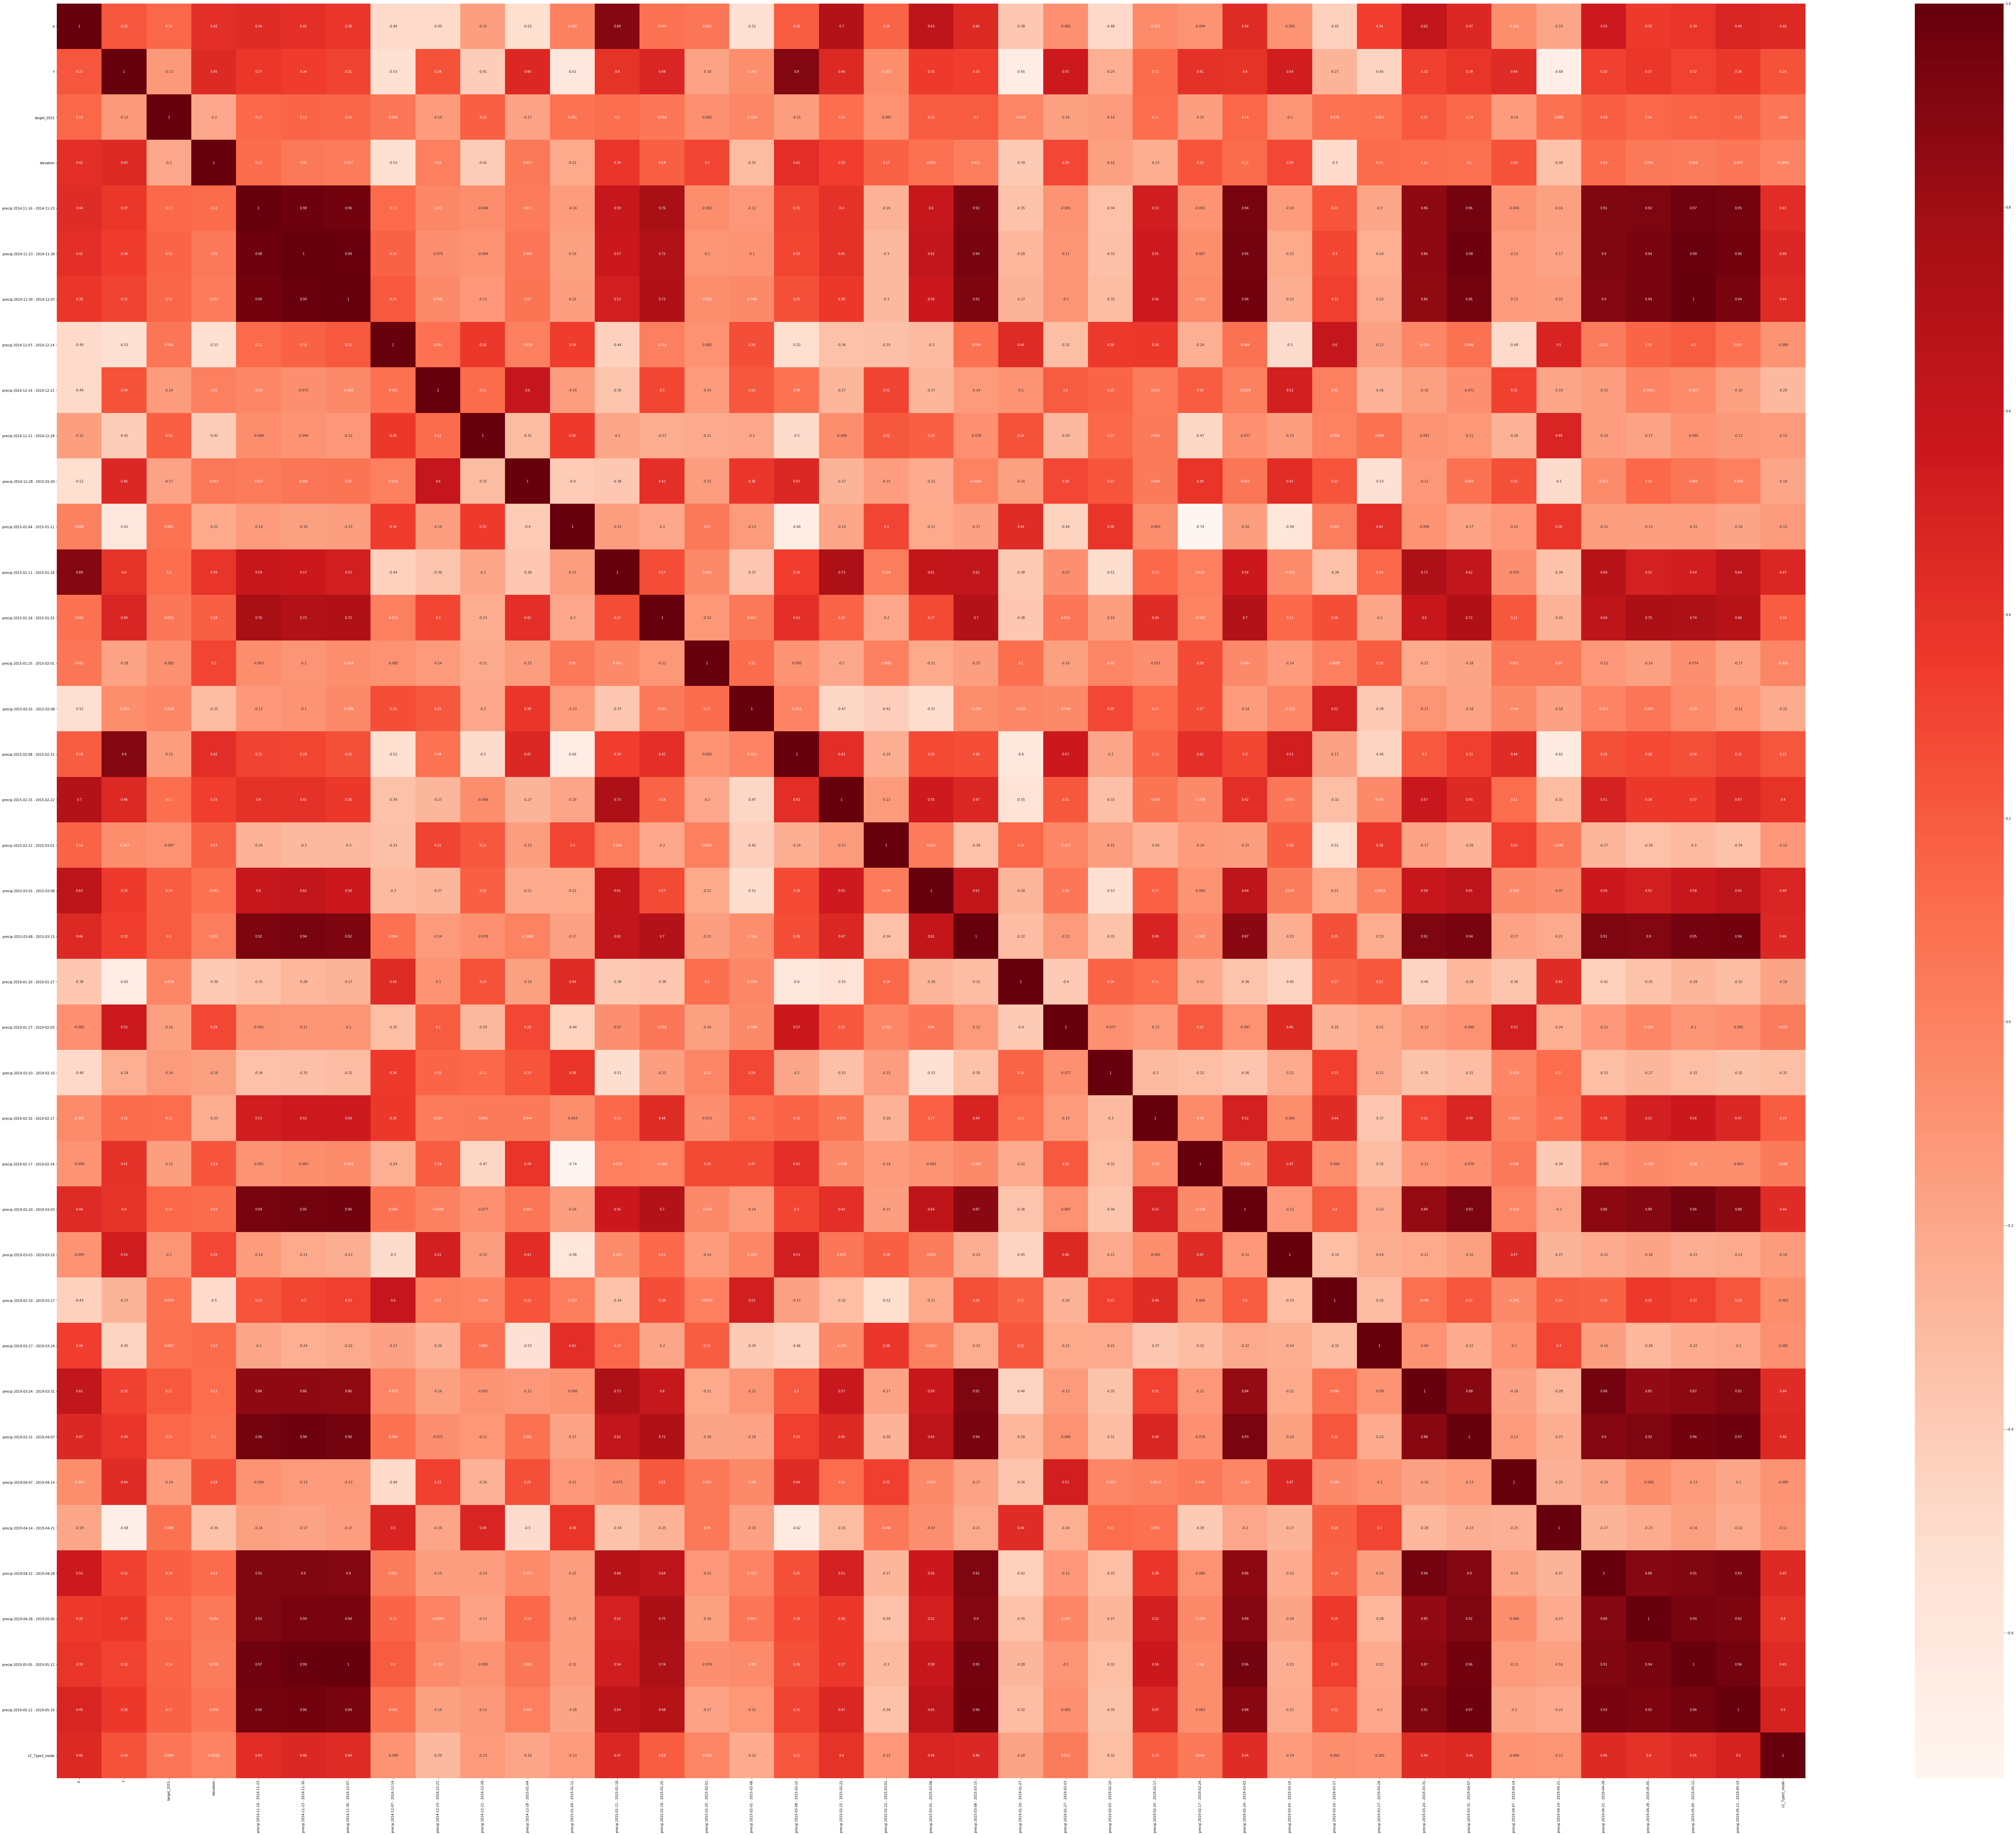

In [0]:
plt.figure(figsize=(120,100))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [0]:
cor_target=abs(cor["target_2015"])

In [0]:
relevant_features=cor_target[cor_target>0.5]

In [0]:
relevant_features

target_2015    1.0
Name: target_2015, dtype: float64

In [0]:
X=train.drop("target_2015",1)
X=train.drop("Square_ID",1)

In [0]:
y=train["target_2015"]


In [0]:
import statsmodels.api as sm

*Backward* Elimination:

In [0]:
cols=list(X.columns)
pmax=1
while(len(cols)>0):
  p=[]
  X_1 = X[cols]
  X_1 = sm.add_constant(X_1)
  model = sm.OLS(y,X_1).fit()
  p = pd.Series(model.pvalues.values[1:],index = cols)      
  pmax = max(p)
  feature_with_p_max = p.idxmax()
  if(pmax>0.05):
    cols.remove(feature_with_p_max)
  else:
    break


selected_features_BE = cols
print(selected_features_BE)




/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['target_2015', 'elevation', 'precip 2014-12-14 - 2014-12-21', 'precip 2014-12-28 - 2015-01-04', 'precip 2015-02-08 - 2015-02-15', 'precip 2019-03-03 - 2019-03-10']


In [0]:
X_relevent=X[["elevation","precip 2014-12-14 - 2014-12-21","precip 2014-12-28 - 2015-01-04","precip 2015-02-08 - 2015-02-15","precip 2019-03-03 - 2019-03-10"]]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_relevent, y, test_size=0.33, random_state=42)

In [0]:
X_train.shape

(11032, 5)

In [0]:
y_train.shape

(11032,)

In [0]:
y_train=np.array(y_train).reshape(-1,1)


In [0]:
print(X_train.shape,y_train.shape)

(11032, 5) (11032, 1)


In [0]:
from sklearn import linear_model
regression_Model = sklearn.linear_model.LinearRegression()
regression_Model.fit(y_train,X_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coeff_df = pd.DataFrame(regression_Model.coef_, X_relevent.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
elevation,-309.849511
precip 2014-12-14 - 2014-12-21,-2.252578
precip 2014-12-28 - 2015-01-04,-10.155725
precip 2015-02-08 - 2015-02-15,-4.329016
precip 2019-03-03 - 2019-03-10,-3.701035


In [0]:
y_test=np.array(y_test).reshape(-1,1)

In [0]:
y_predict=regression_Model.predict(X_test)

ValueError: ignored

In [0]:
from sklearn.metrics import r2_score
r2_score(y_)

In [0]:
X_test.shape

(5434, 5)

In [0]:
X_train.shape

(11032, 5)

In [0]:
y_train.shape

(11032, 1)

In [0]:
y_test.shape

(5434, 1)

In [0]:
X.columns.shape

(39,)

In [0]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [0]:
reg=LassoCV()
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.016595
Best score using built-in LassoCV: 0.888040


In [0]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 15 variables and eliminated the other 24 variables


In [0]:
imp_coef = coef.sort_values()


In [0]:
imp_coef

precip 2019-02-03 - 2019-02-10   -0.001089
precip 2015-02-22 - 2015-03-01   -0.000973
precip 2019-01-20 - 2019-01-27   -0.000796
precip 2015-02-08 - 2015-02-15   -0.000703
precip 2019-02-17 - 2019-02-24   -0.000511
precip 2019-01-27 - 2019-02-03   -0.000153
precip 2014-12-28 - 2015-01-04   -0.000111
elevation                        -0.000051
precip 2019-02-10 - 2019-02-17    0.000000
X                                 0.000000
precip 2019-03-10 - 2019-03-17    0.000000
precip 2019-03-31 - 2019-04-07    0.000000
precip 2019-04-07 - 2019-04-14   -0.000000
precip 2019-04-14 - 2019-04-21   -0.000000
precip 2019-04-21 - 2019-04-28    0.000000
precip 2019-04-28 - 2019-05-05    0.000000
precip 2019-05-05 - 2019-05-12    0.000000
precip 2015-03-08 - 2015-03-15    0.000000
precip 2019-02-24 - 2019-03-03    0.000000
LC_Type1_mode                    -0.000000
precip 2015-02-15 - 2015-02-22    0.000000
precip 2015-02-01 - 2015-02-08   -0.000000
precip 2015-01-25 - 2015-02-01    0.000000
precip 2015